# Zpracování přirozeného jazyka

 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**


## Pokyny k vypracování

  * Natrénujte model NLP (např. Word2Vec) na libovolném dostupném slovním korpusu. Korpus však můžete vytvořit sami (extra body!!!). Jakýkoli jazyk je vítán.
  * Stáhněte si (pomocí webového scrapingu, například **beautiful soup**) článek nebo jakýkoli jiný text, povídku nebo báseň.
  * Vezměte si část svého a nahraďte některá slova nejpodobnějšími podle modelu.
  * Analyzujte výsledný text. Jak je to čitelné? Co když nahradíte každé jedno slovo druhým / třetím nejpodobnějším slovem?

**Domácí úkol bude hodnocen podle**:
  * (až 5 bodů) Kreativita.
  * (až 5 bodů) Popis, předzpracování dat a vizualizace.
  * (až 5 bodů) Implementace.

## Poznámky k odevzdání

  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body.

In [ ]:
### odtud už je to Vaše

In [33]:
import nltk
import pandas as pd
import requests
from bs4 import BeautifulSoup
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation
from gensim.models import Word2Vec
import twint
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import multiprocessing
import stopwordsiso
import string
from string import punctuation
import itertools

#nltk.download()

In [35]:
#!pip3.7 install stopwordsiso

### Fetch Politican Tweets 

In [ ]:
def create_tweet_dataset(username):
    c = twint.Config()
    c.Limit = 1000000
    c.Username = username
    c.Format = 'Username: {username} |  Tweet: {tweet}'
    c.Pandas = True
    c.Store_csv = True
    c.Custom_csv = ['username', 'tweet']
    c.Output = f'tweets_{username}.csv'

    twint.run.Search(c)

In [ ]:
#username = 'PREZIDENTmluvci'
#username = 'AndrejBabis'
#username = 'alenaschillerov'
#username = 'tomio_cz'
username = 'kalousekm'
create_tweet_dataset(username)

#### Load Tweets csv

In [56]:
usernames = ['AndrejBabis', 'PREZIDENTmluvci', 'tomio_cz', 'alenaschillerov', 'kalousekm']

In [57]:
def clean_tweet(text):
    text = text.split('http')[0]
    text = text.split('pic.twitter')[0]
    return text

In [58]:
def tweet_text(username):
    df = pd.read_csv(f'tweets_{username}.csv')
    
    df['tweet'] = df.apply(lambda x: clean_tweet(x['tweet']), axis=1)
    
    text = '. '.join(df['tweet'])
    
    return text

In [59]:
texts = list(map(lambda x: tweet_text(x), usernames))
text = ' '.join(texts)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3265: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Word Vizualization

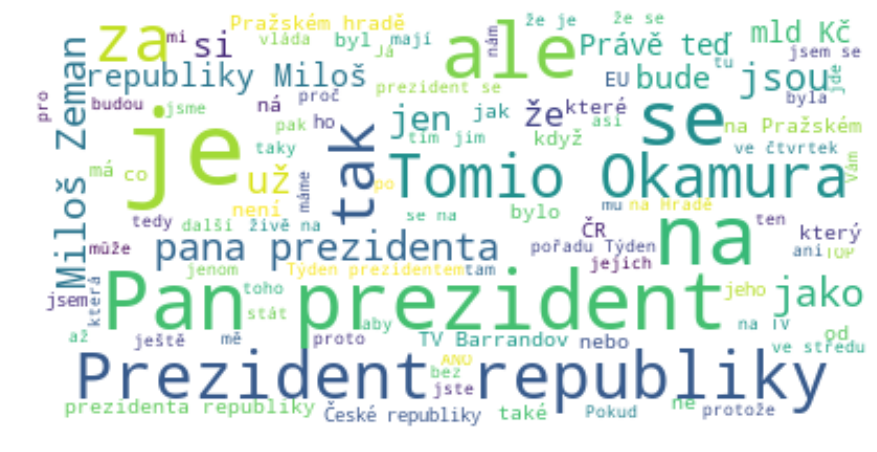

In [60]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=[15, 15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Tokenization

In [61]:
tokens = sent_tokenize(text)
print(f'Number of sentences: {len(tokens)}')

Number of sentences: 93519


In [62]:
tokens = list(map(lambda x: nltk.word_tokenize(x), tokens))

In [63]:
print(f'Number of tokens: {len(list(itertools.chain(*tokens)))}')

Number of tokens: 1119562


In [64]:
def filter_tokens(tokens):
    stops = stopwordsiso.stopwords('cs')
    
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in punctuation]
    tokens = [token for token in tokens if token not in stops]
    tokens = [token for token in tokens if token != '--']
    tokens = [token for token in tokens if token != '“']
    tokens = [token for token in tokens if token != '’']
    tokens = [token for token in tokens if token != '”']
    tokens = [token for token in tokens if token != '\'s']
    tokens = [token for token in tokens if token != '``']
    tokens = [token for token in tokens if token != '\'\'']
    tokens = [token for token in tokens if token != '„']
    tokens = [token.replace('.', '') for token in tokens]
    tokens = [token.replace('.', '') for token in tokens]
    tokens = list(filter(None, tokens))

    
    return tokens

tokens = list(map(lambda x: filter_tokens(x), tokens))
print(f'Number of tokens after filter: {len(list(itertools.chain(*tokens)))}')

Number of tokens after filter: 630352


In [65]:
def most_frequent_token(tokens):
    flatten_tokens = list(itertools.chain(*tokens))
    counts = Counter(flatten_tokens)
    
    sorted_counts = sorted(counts.items(), key=lambda count:count[1], reverse=True)
    
    return sorted_counts

In [66]:
print(f'Most occuring tokens:')
most_frequent_token(tokens)[0:20]

Most occuring tokens:


[('prezident', 5515),
 ('republiky', 3771),
 ('pan', 3507),
 ('prezidenta', 3080),
 ('zeman', 2719),
 ('čr', 1789),
 ('teď', 1759),
 ('pana', 1731),
 ('okamura', 1571),
 ('tomio', 1563),
 ('kč', 1551),
 ('eu', 1534),
 ('právě', 1468),
 ('miloš', 1426),
 ('české', 1375),
 ('hradě', 1365),
 ('dne', 1304),
 ('prezidentem', 1143),
 ('mld', 1140),
 ('vlády', 1094)]

### Word2Vec

In [67]:
# train model
model = Word2Vec(tokens, min_count=3, size=25, workers=multiprocessing.cpu_count(), window=5, iter=100)
model.save('word2vec')
model.wv.save_word2vec_format('word2vec.model', binary=True)

In [121]:
model.wv.most_similar(positive=['piráti'])

[('opoziční', 0.745317280292511),
 ('demokratickou', 0.7198208570480347),
 ('piratskastrana', 0.7175881266593933),
 ('kducsl', 0.7001708149909973),
 ('opozici', 0.6922801733016968),
 ('zastupitelstvo', 0.6881768107414246),
 ('přitom', 0.6875065565109253),
 ('projevech', 0.6740751266479492),
 ('voliči', 0.6731324791908264),
 ('komedii', 0.6687021255493164)]

:D

In [134]:
model.most_similar(positive=['2020'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('2019', 0.9370110630989075),
 ('2018', 0.9121652245521545),
 ('2017', 0.8798843622207642),
 ('2016', 0.7971913814544678),
 ('2021', 0.7878967523574829),
 ('24', 0.7692206501960754),
 ('16', 0.7445101141929626),
 ('1998', 0.6921610236167908),
 ('3', 0.6862178444862366),
 ('2015', 0.6844918727874756)]

In [132]:
model.most_similar(positive=['hitler'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('lidumil', 0.8294971585273743),
 ('žukov', 0.8143023252487183),
 ('osvobodil', 0.8033273220062256),
 ('malinovskij', 0.7692645192146301),
 ('rozzuřil', 0.7646853923797607),
 ('die', 0.7600239515304565),
 ('sein', 0.7583737969398499),
 ('welt', 0.7571045160293579),
 ('adolf', 0.7538939118385315),
 ('idiota', 0.7367569208145142)]

**OMG! We just need more data!**

### Sample Text

In [70]:
url = 'https://www.idnes.cz/zpravy/domaci/andrej-babis-projev-poselstvi-opozice-premier-koronavirus.A200323_205129_domaci_kane'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

#sample_text = soup.find('p').getText()
#[t for t in soup.find_all(text=True)]

#sample_text = soup.get_text()[6846:7125]

sample_text = soup.find('div', 'bbtext').getText()
sample_text = sample_text.replace('\n', '')
sample_text = sample_text.replace('\xa0', '')
sample_text = sample_text.lower()

Most frequent words in sample text

In [109]:
most_frequent_token([filter_tokens(word_tokenize(sample_text))])[0:20]

[('babiš', 8),
 ('března', 8),
 ('2020', 8),
 ('premiér', 7),
 ('napsal', 7),
 ('situace', 6),
 ('dobrovolníkům', 4),
 ('poděkoval', 4),
 ('slova', 4),
 ('příspěvek', 4),
 ('archivován', 4),
 ('23', 4),
 ('retweet', 4),
 ('poděkování', 3),
 ('zdravotníkům', 3),
 ('předseda', 3),
 ('vláda', 3),
 ('projev', 3),
 ('mu', 3),
 ('odpovědět', 3)]

### Replace similiar words in text

In [72]:
from IPython.display import Markdown, display

def replace_words_in(text, n_similar, words):
    text = list(
        map(lambda x: text.replace(word, "**" + model.most_similar(word, topn=topn)[topn-1][0] + "**"), words)
    )
    
    display(Markdown(text))

In [136]:
sample_text

' poděkování za solidaritu a spolupráci, které v pondělí večer premiér andrej babiš ve své řeči směřoval k dobrovolníkům i profesionálům ve všech oborech i rodinám, ocenili státníci. babiš nezapomněl pochválil trpělivost, s jakou lidé přijímají restriktivní opatření. poděkoval ivšem zdravotníkům, policistům, hasičům i vojákům, stejně jako dobrovolníkům, kteří nezištně pomáhají druhým. „byl empatický i sebekritický, je dobře, že vystoupil, byť jsem čekal každým dnem, kdy českou veřejnost povzbudí,“ napsal čtk odborový předák josef středula. dodal, že je třeba věřit tomu, že budou povzbudivá slova provázena dalšími kroky ve prospěch zvládnutí situace. s proslovem souhlasili státníci napříč politickým spektrem.„oceňuji, že pan premiér mluvil slušně a poděkoval zdravotníkům i dobrovolníkům,“ napsal předseda české pirátské strany ivan bartoš.ivan bartoš @pirativanbartosoceňuji, že pan premiér mluvil slušně a poděkoval zdravotníkům i dobrovolníkům. je ale klíčové, aby vláda komunikovala s ob

In [135]:
replace_words(sample_text, 1, ['pirátské', 'babiš', 'zeman', 'poděkoval', 'předseda'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


 poděkování za solidaritu a spolupráci, které v pondělí večer premiér andrej **andrej** ve své řeči směřoval k dobrovolníkům i profesionálům ve všech oborech i rodinám, ocenili státníci. **andrej** nezapomněl pochválil trpělivost, s jakou lidé přijímají restriktivní opatření. **narozeninám** ivšem zdravotníkům, policistům, hasičům i vojákům, stejně jako dobrovolníkům, kteří nezištně pomáhají druhým. „byl empatický i sebekritický, je dobře, že vystoupil, byť jsem čekal každým dnem, kdy českou veřejnost povzbudí,“ napsal čtk odborový předák josef středula. dodal, že je třeba věřit tomu, že budou povzbudivá slova provázena dalšími kroky ve prospěch zvládnutí situace. s proslovem souhlasili státníci napříč politickým spektrem.„oceňuji, že pan premiér mluvil slušně a **narozeninám** zdravotníkům i dobrovolníkům,“ napsal **poslanec** české **bartoše** strany ivan bartoš.ivan bartoš @pirativanbartosoceňuji, že pan premiér mluvil slušně a **narozeninám** zdravotníkům i dobrovolníkům. je ale klíčové, aby vláda komunikovala s občany i opozicí o svých plánech (pokud nějaké má) a věci domýšlela. premiér by neměl před lidmi hrát týmového hráče a v reálu vše, co nevymyslí on, zadupávat.23. března 2020 v 20:39, příspěvek archivován: 23. března 2020 v 21:04oblíbit retweet odpověděthamáček napsal, že projev vnímal jako „adekvátní závažnosti situace“. „šlo ověcné hodnocení situace. a výzvu k respektu vůči opatřením s přáním zvládnutí situace pro celý národ, tedy s pozitivním vyústěním,“ napsal **poslanec** komunistů filip.řeč někteří srovnávali s nedávným projevem prezidenta **prezident**a.„s obsahem souhlasím a děkuju mu za poděkování občanům české republiky,“ ohodnotila premiérovu řeč markéta adamová.markéta adamová @market_aprojev andreje **andrej**e byl projevem, se kterým měla přijít hlava státu. rozdíl je v tom, že slova miloše **prezident**a pochází z jeho hlavy, slova andreje **andrej**e jsou od jeho pr týmu. s obsahem však souhlasím a děkuju mu za poděkování občanům čr. ti situaci zvládají opravdu obdivuhodně.23. března 2020 v 20:25, příspěvek archivován: 23. března 2020 v 21:06oblíbit retweet odpovědět **andrej** se v projevu vrátil i k nedostatku ochranných pomůcek, kvůli kterému v minulosti čelil kritice jak on sám, tak ministr zdravotnictví adam vojtěch. podle premiéra jsou roušky a respirátory celosvětově nedostatkové zboží a na globálním trhu nebyly dostupné už na přelomu ledna a února. misc.video({ data: "//servix.idnes.cz/media/video.aspx?idvideo=v200323_192641_idnestv_pest&idrubriky=domaci&idostrova=zpravodaj&idclanku=a200323_205129_domaci_kane", ratio: 16/9 });koronavirussledovat další díly na idnes.tvfiala: nabízíme podanou rukuchyby  a problémy při řešení epidemie však připustil.„je jich spousta. aby ne. je to krizová situace, na kterou nebyla připravena jediná země v evropě,“ uvedl **andrej**. podle předsedy opozice petra fialy je správné, že **andrej** reagoval na chyby vlády. fiala také přislíbil, že podpoří všechny návrhy, které lidem pomohou. **poslanec** opoziční stan vít rakušan poznamenal, že uklidňující a vysvětlující slova čekali všichni dříve. i on však ocenil, že si premiér plně uvědomuje, v jak náročných podmínkách záchranáři, lékaři a další profese pracují, a **narozeninám** jim za to. „nezakryje tím však selhání vlády ochránit výše zmíněné profese před možnou nákazou. a oceňuji, že andrej **andrej** dokázal alespoň na obrazovce mluvit s pokorou a za chyby se omluvit,“ napsal rakušan. petr fiala @p_fialaje správné, že premiér ve svém projevu vyzval k soudržnosti a reagoval na chyby vlády, které se staly. záleží na tom, s jakými konkrétními kroky nyní vláda přijde. stále nabízíme podanou ruku, podpoříme všechny návrhy, které pomohou lidem.23. března 2020 v 20:42, příspěvek archivován: 23. března 2020 v 21:12oblíbit retweet odpovědět podle předsedy opoziční spd tomia okamury **andrej** neřekl nic nového a konkrétního. „bohužel ani slovo o tom, co vlastně vláda a premiér konkrétně udělají pro to, abychom vše překonali a bylo lépe. jen uklidňování, omlouvání, chválení, což je namístě, a také vymlouvání,“ sdělil okamura.dle bývalého europoslance pavla teličky byl projev lepší než čtvrteční **prezident**ův. senátor jiří drahoš míní, že byl přesně takový, jaký si žádá krizová situace. „porovnejte s vystoupením hlavy státu,“ poznamenal na twitteru.jeho kolega v senátu tomáš czernin napsal, že se **andrej** poprvé omluvil, chyběl mu ale plán, kdy a za jakých okolností se omezení budou rušit. „teď už vím, že umí i číst. nebyl to projev, že bych zvolal: veď nás, důvěřuji ti!“ shrnul. nejkratší hodnocení celého projevu premiéra napsal dominik feri. bylo to dobré, uvedl na twitteru.dominik feri @dominikferibylo to dobré.23. března 2020 v 20:19, příspěvek archivován: 23. března 2020 v 21:17oblíbit retweet odpovědět

In [137]:
replace_words(sample_text, 2, ['pirátské', 'babiš', 'zeman', 'poděkoval', 'předseda'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


 poděkování za solidaritu a spolupráci, které v pondělí večer premiér andrej **babišem** ve své řeči směřoval k dobrovolníkům i profesionálům ve všech oborech i rodinám, ocenili státníci. **babišem** nezapomněl pochválil trpělivost, s jakou lidé přijímají restriktivní opatření. **blahopřeji** ivšem zdravotníkům, policistům, hasičům i vojákům, stejně jako dobrovolníkům, kteří nezištně pomáhají druhým. „byl empatický i sebekritický, je dobře, že vystoupil, byť jsem čekal každým dnem, kdy českou veřejnost povzbudí,“ napsal čtk odborový předák josef středula. dodal, že je třeba věřit tomu, že budou povzbudivá slova provázena dalšími kroky ve prospěch zvládnutí situace. s proslovem souhlasili státníci napříč politickým spektrem.„oceňuji, že pan premiér mluvil slušně a **blahopřeji** zdravotníkům i dobrovolníkům,“ napsal **bělobrádka** české **bělobrádka** strany ivan bartoš.ivan bartoš @pirativanbartosoceňuji, že pan premiér mluvil slušně a **blahopřeji** zdravotníkům i dobrovolníkům. je ale klíčové, aby vláda komunikovala s občany i opozicí o svých plánech (pokud nějaké má) a věci domýšlela. premiér by neměl před lidmi hrát týmového hráče a v reálu vše, co nevymyslí on, zadupávat.23. března 2020 v 20:39, příspěvek archivován: 23. března 2020 v 21:04oblíbit retweet odpověděthamáček napsal, že projev vnímal jako „adekvátní závažnosti situace“. „šlo ověcné hodnocení situace. a výzvu k respektu vůči opatřením s přáním zvládnutí situace pro celý národ, tedy s pozitivním vyústěním,“ napsal **bělobrádka** komunistů filip.řeč někteří srovnávali s nedávným projevem prezidenta **pan**a.„s obsahem souhlasím a děkuju mu za poděkování občanům české republiky,“ ohodnotila premiérovu řeč markéta adamová.markéta adamová @market_aprojev andreje **babišem**e byl projevem, se kterým měla přijít hlava státu. rozdíl je v tom, že slova miloše **pan**a pochází z jeho hlavy, slova andreje **babišem**e jsou od jeho pr týmu. s obsahem však souhlasím a děkuju mu za poděkování občanům čr. ti situaci zvládají opravdu obdivuhodně.23. března 2020 v 20:25, příspěvek archivován: 23. března 2020 v 21:06oblíbit retweet odpovědět **babišem** se v projevu vrátil i k nedostatku ochranných pomůcek, kvůli kterému v minulosti čelil kritice jak on sám, tak ministr zdravotnictví adam vojtěch. podle premiéra jsou roušky a respirátory celosvětově nedostatkové zboží a na globálním trhu nebyly dostupné už na přelomu ledna a února. misc.video({ data: "//servix.idnes.cz/media/video.aspx?idvideo=v200323_192641_idnestv_pest&idrubriky=domaci&idostrova=zpravodaj&idclanku=a200323_205129_domaci_kane", ratio: 16/9 });koronavirussledovat další díly na idnes.tvfiala: nabízíme podanou rukuchyby  a problémy při řešení epidemie však připustil.„je jich spousta. aby ne. je to krizová situace, na kterou nebyla připravena jediná země v evropě,“ uvedl **babišem**. podle předsedy opozice petra fialy je správné, že **babišem** reagoval na chyby vlády. fiala také přislíbil, že podpoří všechny návrhy, které lidem pomohou. **bělobrádka** opoziční stan vít rakušan poznamenal, že uklidňující a vysvětlující slova čekali všichni dříve. i on však ocenil, že si premiér plně uvědomuje, v jak náročných podmínkách záchranáři, lékaři a další profese pracují, a **blahopřeji** jim za to. „nezakryje tím však selhání vlády ochránit výše zmíněné profese před možnou nákazou. a oceňuji, že andrej **babišem** dokázal alespoň na obrazovce mluvit s pokorou a za chyby se omluvit,“ napsal rakušan. petr fiala @p_fialaje správné, že premiér ve svém projevu vyzval k soudržnosti a reagoval na chyby vlády, které se staly. záleží na tom, s jakými konkrétními kroky nyní vláda přijde. stále nabízíme podanou ruku, podpoříme všechny návrhy, které pomohou lidem.23. března 2020 v 20:42, příspěvek archivován: 23. března 2020 v 21:12oblíbit retweet odpovědět podle předsedy opoziční spd tomia okamury **babišem** neřekl nic nového a konkrétního. „bohužel ani slovo o tom, co vlastně vláda a premiér konkrétně udělají pro to, abychom vše překonali a bylo lépe. jen uklidňování, omlouvání, chválení, což je namístě, a také vymlouvání,“ sdělil okamura.dle bývalého europoslance pavla teličky byl projev lepší než čtvrteční **pan**ův. senátor jiří drahoš míní, že byl přesně takový, jaký si žádá krizová situace. „porovnejte s vystoupením hlavy státu,“ poznamenal na twitteru.jeho kolega v senátu tomáš czernin napsal, že se **babišem** poprvé omluvil, chyběl mu ale plán, kdy a za jakých okolností se omezení budou rušit. „teď už vím, že umí i číst. nebyl to projev, že bych zvolal: veď nás, důvěřuji ti!“ shrnul. nejkratší hodnocení celého projevu premiéra napsal dominik feri. bylo to dobré, uvedl na twitteru.dominik feri @dominikferibylo to dobré.23. března 2020 v 20:19, příspěvek archivován: 23. března 2020 v 21:17oblíbit retweet odpovědět

In [138]:
replace_words(sample_text, 3, ['pirátské', 'babiš', 'zeman', 'poděkoval', 'předseda'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


 poděkování za solidaritu a spolupráci, které v pondělí večer premiér andrej **tvrdí** ve své řeči směřoval k dobrovolníkům i profesionálům ve všech oborech i rodinám, ocenili státníci. **tvrdí** nezapomněl pochválil trpělivost, s jakou lidé přijímají restriktivní opatření. **brzké** ivšem zdravotníkům, policistům, hasičům i vojákům, stejně jako dobrovolníkům, kteří nezištně pomáhají druhým. „byl empatický i sebekritický, je dobře, že vystoupil, byť jsem čekal každým dnem, kdy českou veřejnost povzbudí,“ napsal čtk odborový předák josef středula. dodal, že je třeba věřit tomu, že budou povzbudivá slova provázena dalšími kroky ve prospěch zvládnutí situace. s proslovem souhlasili státníci napříč politickým spektrem.„oceňuji, že pan premiér mluvil slušně a **brzké** zdravotníkům i dobrovolníkům,“ napsal **předsedou** české **koláře** strany ivan bartoš.ivan bartoš @pirativanbartosoceňuji, že pan premiér mluvil slušně a **brzké** zdravotníkům i dobrovolníkům. je ale klíčové, aby vláda komunikovala s občany i opozicí o svých plánech (pokud nějaké má) a věci domýšlela. premiér by neměl před lidmi hrát týmového hráče a v reálu vše, co nevymyslí on, zadupávat.23. března 2020 v 20:39, příspěvek archivován: 23. března 2020 v 21:04oblíbit retweet odpověděthamáček napsal, že projev vnímal jako „adekvátní závažnosti situace“. „šlo ověcné hodnocení situace. a výzvu k respektu vůči opatřením s přáním zvládnutí situace pro celý národ, tedy s pozitivním vyústěním,“ napsal **předsedou** komunistů filip.řeč někteří srovnávali s nedávným projevem prezidenta **rozstřelu**a.„s obsahem souhlasím a děkuju mu za poděkování občanům české republiky,“ ohodnotila premiérovu řeč markéta adamová.markéta adamová @market_aprojev andreje **tvrdí**e byl projevem, se kterým měla přijít hlava státu. rozdíl je v tom, že slova miloše **rozstřelu**a pochází z jeho hlavy, slova andreje **tvrdí**e jsou od jeho pr týmu. s obsahem však souhlasím a děkuju mu za poděkování občanům čr. ti situaci zvládají opravdu obdivuhodně.23. března 2020 v 20:25, příspěvek archivován: 23. března 2020 v 21:06oblíbit retweet odpovědět **tvrdí** se v projevu vrátil i k nedostatku ochranných pomůcek, kvůli kterému v minulosti čelil kritice jak on sám, tak ministr zdravotnictví adam vojtěch. podle premiéra jsou roušky a respirátory celosvětově nedostatkové zboží a na globálním trhu nebyly dostupné už na přelomu ledna a února. misc.video({ data: "//servix.idnes.cz/media/video.aspx?idvideo=v200323_192641_idnestv_pest&idrubriky=domaci&idostrova=zpravodaj&idclanku=a200323_205129_domaci_kane", ratio: 16/9 });koronavirussledovat další díly na idnes.tvfiala: nabízíme podanou rukuchyby  a problémy při řešení epidemie však připustil.„je jich spousta. aby ne. je to krizová situace, na kterou nebyla připravena jediná země v evropě,“ uvedl **tvrdí**. podle předsedy opozice petra fialy je správné, že **tvrdí** reagoval na chyby vlády. fiala také přislíbil, že podpoří všechny návrhy, které lidem pomohou. **předsedou** opoziční stan vít rakušan poznamenal, že uklidňující a vysvětlující slova čekali všichni dříve. i on však ocenil, že si premiér plně uvědomuje, v jak náročných podmínkách záchranáři, lékaři a další profese pracují, a **brzké** jim za to. „nezakryje tím však selhání vlády ochránit výše zmíněné profese před možnou nákazou. a oceňuji, že andrej **tvrdí** dokázal alespoň na obrazovce mluvit s pokorou a za chyby se omluvit,“ napsal rakušan. petr fiala @p_fialaje správné, že premiér ve svém projevu vyzval k soudržnosti a reagoval na chyby vlády, které se staly. záleží na tom, s jakými konkrétními kroky nyní vláda přijde. stále nabízíme podanou ruku, podpoříme všechny návrhy, které pomohou lidem.23. března 2020 v 20:42, příspěvek archivován: 23. března 2020 v 21:12oblíbit retweet odpovědět podle předsedy opoziční spd tomia okamury **tvrdí** neřekl nic nového a konkrétního. „bohužel ani slovo o tom, co vlastně vláda a premiér konkrétně udělají pro to, abychom vše překonali a bylo lépe. jen uklidňování, omlouvání, chválení, což je namístě, a také vymlouvání,“ sdělil okamura.dle bývalého europoslance pavla teličky byl projev lepší než čtvrteční **rozstřelu**ův. senátor jiří drahoš míní, že byl přesně takový, jaký si žádá krizová situace. „porovnejte s vystoupením hlavy státu,“ poznamenal na twitteru.jeho kolega v senátu tomáš czernin napsal, že se **tvrdí** poprvé omluvil, chyběl mu ale plán, kdy a za jakých okolností se omezení budou rušit. „teď už vím, že umí i číst. nebyl to projev, že bych zvolal: veď nás, důvěřuji ti!“ shrnul. nejkratší hodnocení celého projevu premiéra napsal dominik feri. bylo to dobré, uvedl na twitteru.dominik feri @dominikferibylo to dobré.23. března 2020 v 20:19, příspěvek archivován: 23. března 2020 v 21:17oblíbit retweet odpovědět